In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [6]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [7]:
mensual_p = mensual['n_trips']

In [8]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [9]:
mensual_p = mensual_p.reset_index()

In [10]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [116]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=30, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/qyhyx6v5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/6527_yx2.json
02:13:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=36168', 'data', 'file=/tmp/tmpul_yn2ty/qyhyx6v5.json', 'init=/tmp/tmpul_yn2ty/6527_yx2.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelhqxtcdra/prophet_model-20241119021329_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=36168', 'data', 'file=/tmp/tmpul_yn2ty/qyhyx6v5.json', 'init=/tmp/tmpul_yn2ty/6527_yx2.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelhqxtcdra/prophet_model-20241119021329_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

02:13:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=36168', 'data', 'file=/tmp/tmpul_yn2ty/qyhyx6v5.json', 'init=/tmp/tmpul_yn2ty/6527_yx2.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelhqxtcdra/prophet_model-20241119021329_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_modelhqxtcdra/prophet_model-20241119021329_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_modelhqxtcdra/prophet_model-20241119021329_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [117]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.828591e+06,2.981017e+06,3.174722e+06,2.754676e+06,2.895147e+06,247770.628858,183377.633709,307091.274266,247770.628858,183377.633709,307091.274266,0.0,0.0,0.0,3.076361e+06
1,2022-04-30,2.814888e+06,2.880217e+06,3.070099e+06,2.753925e+06,2.875900e+06,160260.847944,91174.972849,231530.883609,160260.847944,91174.972849,231530.883609,0.0,0.0,0.0,2.975149e+06
2,2022-05-31,2.801345e+06,2.930250e+06,3.121277e+06,2.744485e+06,2.857860e+06,223954.758144,163980.855693,283536.015892,223954.758144,163980.855693,283536.015892,0.0,0.0,0.0,3.025300e+06
3,2022-06-30,2.789006e+06,2.828195e+06,3.012138e+06,2.734486e+06,2.843120e+06,131796.924872,71193.004299,194905.292605,131796.924872,71193.004299,194905.292605,0.0,0.0,0.0,2.920803e+06
4,2022-07-31,2.776095e+06,2.499083e+06,2.681979e+06,2.725790e+06,2.829495e+06,-183555.890000,-234896.232236,-135311.223219,-183555.890000,-234896.232236,-135311.223219,0.0,0.0,0.0,2.592539e+06
5,2022-08-31,2.761014e+06,2.433909e+06,2.618281e+06,2.710945e+06,2.811855e+06,-234216.973128,-292013.234238,-184740.522369,-234216.973128,-292013.234238,-184740.522369,0.0,0.0,0.0,2.526797e+06
6,2022-09-30,2.743855e+06,2.431468e+06,2.635025e+06,2.693121e+06,2.794623e+06,-210630.401858,-295108.803271,-142876.425874,-210630.401858,-295108.803271,-142876.425874,0.0,0.0,0.0,2.533224e+06
7,2022-10-31,2.723732e+06,2.855208e+06,3.063537e+06,2.670379e+06,2.771143e+06,236639.656979,169847.087630,303530.135440,236639.656979,169847.087630,303530.135440,0.0,0.0,0.0,2.960371e+06
8,2022-11-30,2.702556e+06,2.539044e+06,2.755361e+06,2.652965e+06,2.751897e+06,-56924.409121,-116105.830629,11716.801917,-56924.409121,-116105.830629,11716.801917,0.0,0.0,0.0,2.645632e+06
9,2022-12-31,2.680124e+06,2.629591e+06,2.842113e+06,2.630007e+06,2.729646e+06,53355.855963,-26330.496138,128721.266310,53355.855963,-26330.496138,128721.266310,0.0,0.0,0.0,2.733480e+06


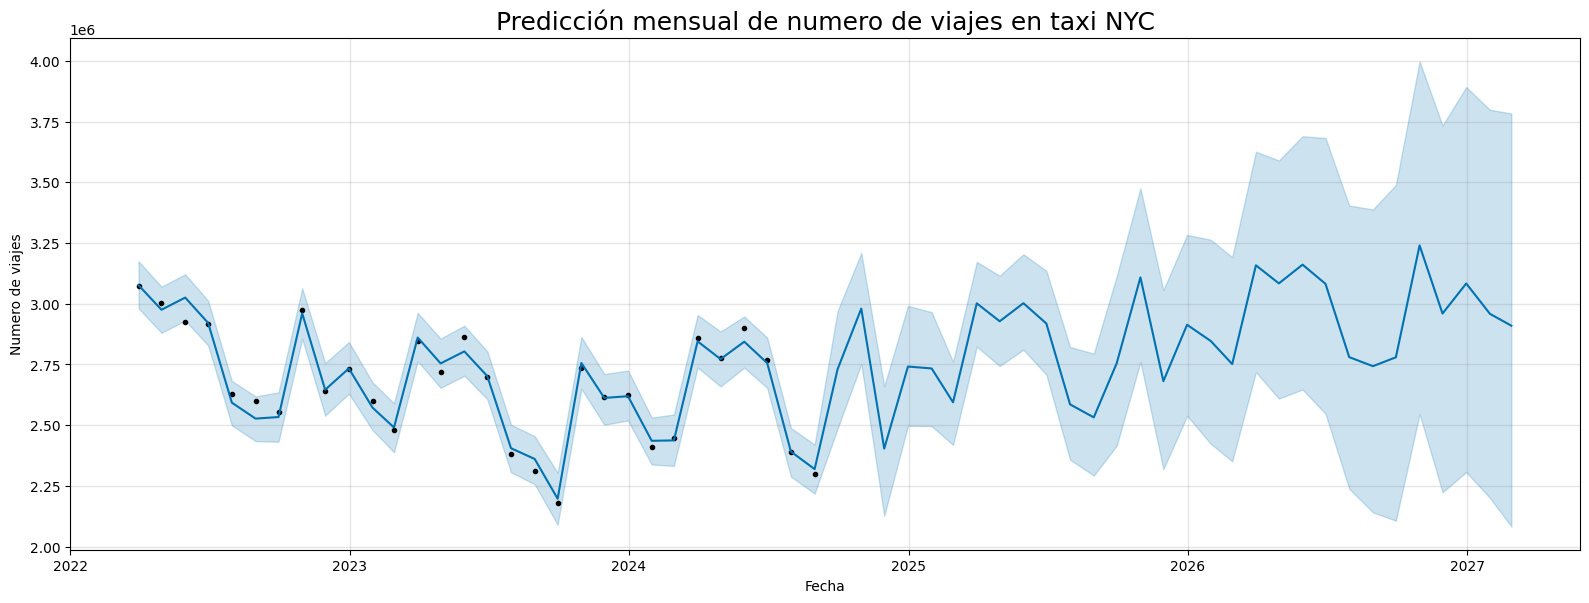

In [118]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

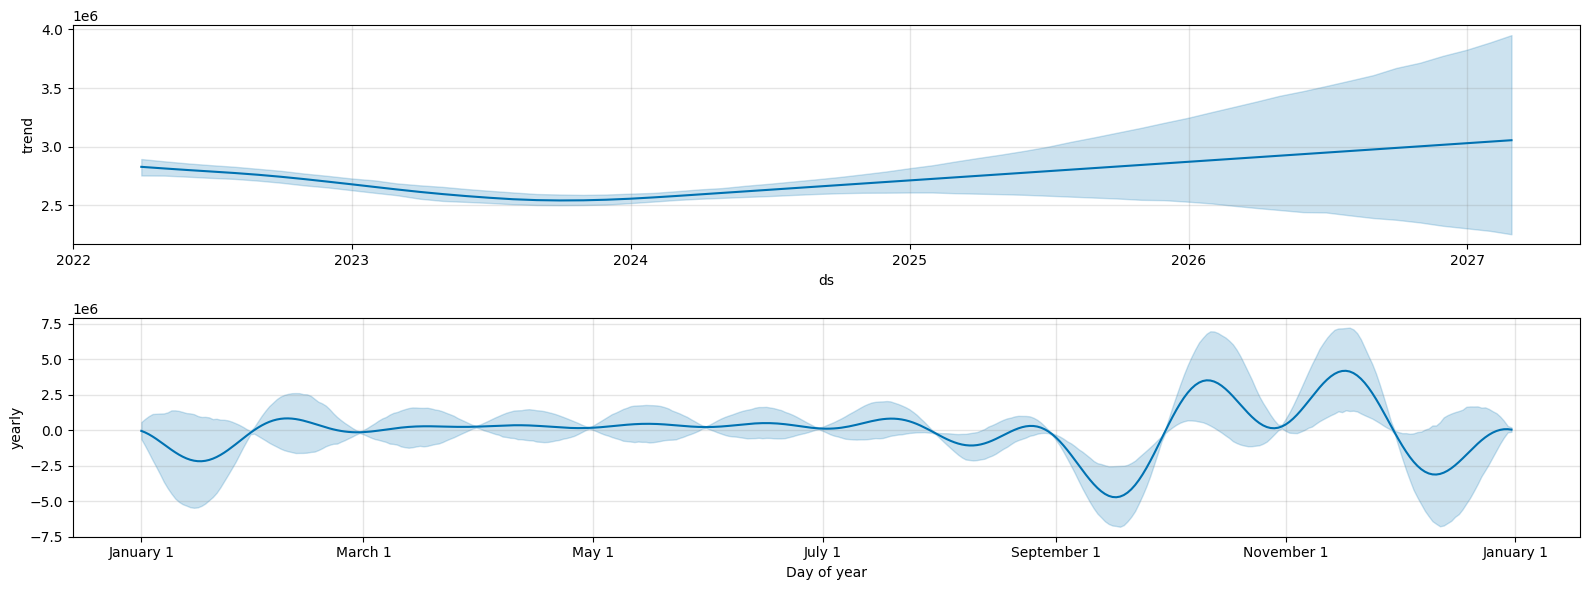

In [119]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [120]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [121]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/znaclkil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/vf8fgljq.json
02:13:34 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=62288', 'data', 'file=/tmp/tmpul_yn2ty/znaclkil.json', 'init=/tmp/tmpul_yn2ty/vf8fgljq.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modely624bea4/prophet_model-20241119021334_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=62288', 'data', 'file=/tmp/tmpul_yn2ty/znaclkil.json', 'init=/tmp/tmpul_yn2ty/vf8fgljq.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modely624bea4/prophet_model-20241119021334_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

02:13:37 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=62288', 'data', 'file=/tmp/tmpul_yn2ty/znaclkil.json', 'init=/tmp/tmpul_yn2ty/vf8fgljq.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modely624bea4/prophet_model-20241119021334_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_modely624bea4/prophet_model-20241119021334_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_modely624bea4/prophet_model-20241119021334_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [122]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.368974e+06,2.044811e+06,2.744312e+06,2179200,2023-09-01
1,2023-10-31,2.695577e+06,2.361848e+06,3.114902e+06,2736389,2023-09-01
2,2023-11-30,2.451168e+06,2.102143e+06,2.800792e+06,2616757,2023-09-01
3,2023-12-31,2.485488e+06,2.091366e+06,2.870922e+06,2625768,2023-09-01
4,2024-01-31,2.391282e+06,2.026638e+06,2.746504e+06,2409342,2023-09-01
5,2024-02-29,2.430634e+06,1.670758e+06,3.220818e+06,2448952,2023-09-01
6,2024-03-31,2.641247e+06,2.208785e+06,3.044756e+06,2858661,2023-09-01
7,2024-04-30,2.621700e+06,2.220729e+06,3.034373e+06,2777362,2023-09-01
8,2024-05-31,2.275824e+06,1.828135e+06,2.713168e+06,2899539,2023-09-01
9,2024-06-30,2.454465e+06,1.955306e+06,2.953467e+06,2767032,2023-09-01


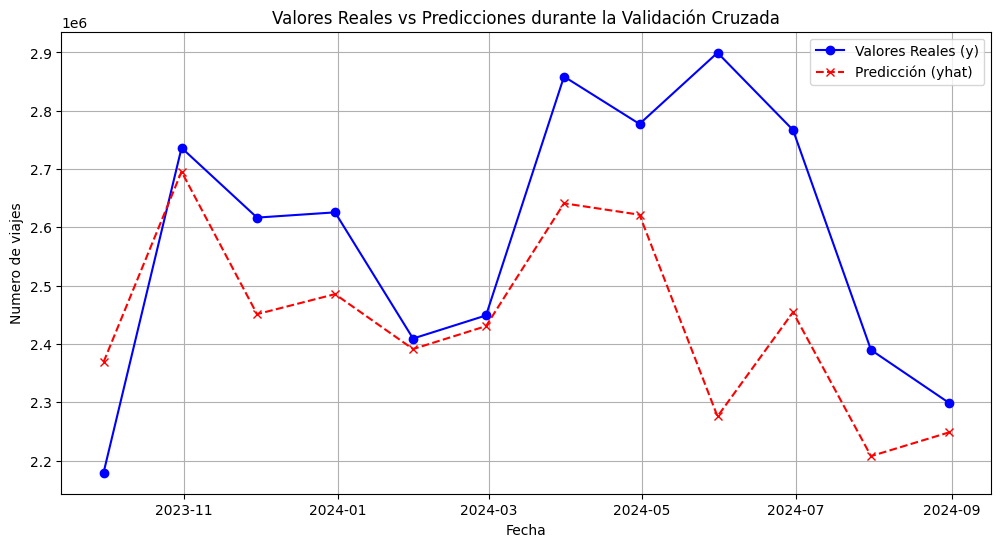

In [123]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


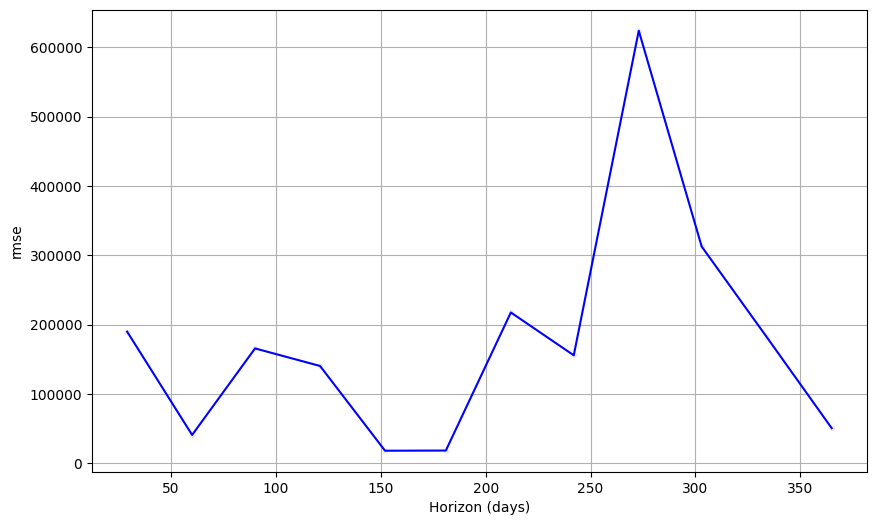

In [124]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [125]:
df_p_1 = performance_metrics(df_cv_1)

In [126]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 176242.06642922023


In [127]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 176242.06642922023


In [128]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [129]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.06600550184221525


In [130]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,5.661462e+10,176242.066429,176242.066429,0.066006,0.066006,0.069392,0.916667
std,109 days 20:33:46.987269072,1.082024e+11,166962.228327,166962.228327,0.057796,0.057796,0.064370,0.288675
min,29 days 00:00:00,3.261551e+08,18059.764899,18059.764899,0.007480,0.007480,0.007508,0.000000
25%,113 days 06:00:00,2.338958e+09,48175.559766,48175.559766,0.020246,0.020246,0.020458,1.000000
50%,196 days 12:00:00,2.582519e+10,160625.512415,160625.512415,0.059663,0.059663,0.061505,1.000000
75%,280 days 12:00:00,3.882796e+10,196684.288157,196684.288157,0.078916,0.078916,0.080271,1.000000
max,365 days 00:00:00,3.890202e+11,623714.827815,623714.827815,0.215108,0.215108,0.241032,1.000000


In [131]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,5.661462e+10,237938.268311,176242.066429,0.066006,0.059663,0.069392,0.916667


In [133]:
forecast_1.to_csv('forecast_mensual.csv')